In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('health care diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

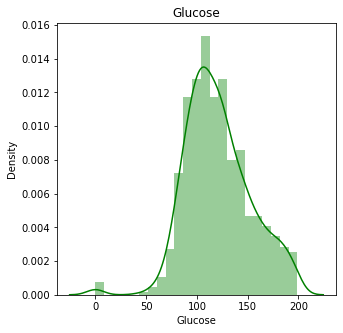

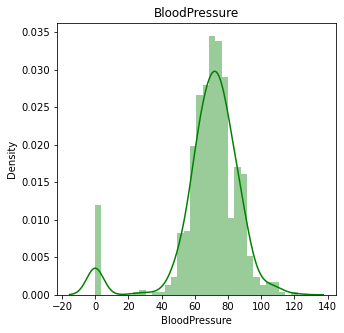

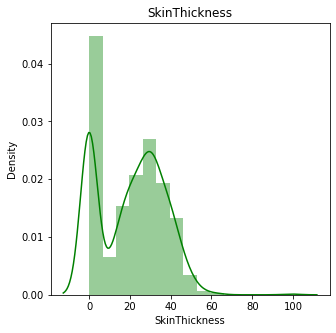

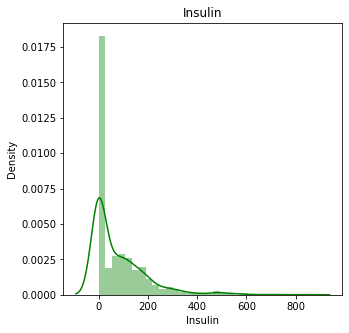

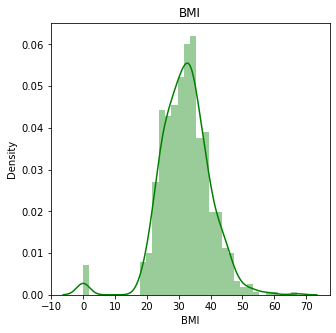

In [5]:
# Histograms to analyse the data distribution
for i in cols:
    plt.figure(figsize = (5, 5))
    sns.distplot(df[i],color="green")
    plt.title(i)

In [6]:
# Since values which are zero for these features are meaningless so changing them to nan for knn imputation
for i in cols:
    df.loc[df[i] == 0 , i] = np.nan

In [7]:
from impyute.imputation.cs import fast_knn

In [8]:
# start the KNN training
imputed_training = fast_knn(df.values, k=30)
imputed_training

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
imputed_df = pd.DataFrame(imputed_training)
imputed_df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.000000,155.333764,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.367818,155.374337,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
imputed_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Final imputed data after missing/null value treatment (in our case using knn)
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,155.333764,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.367818,155.374337,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


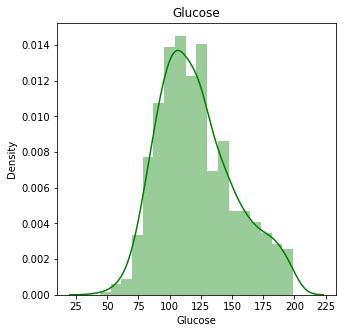

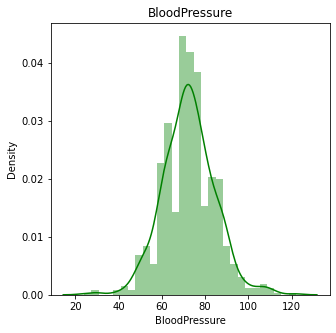

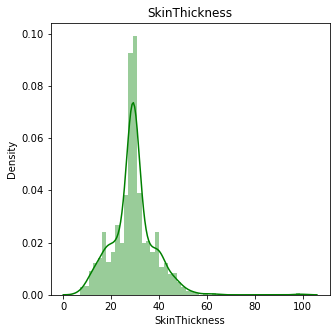

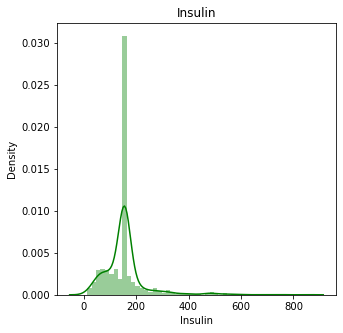

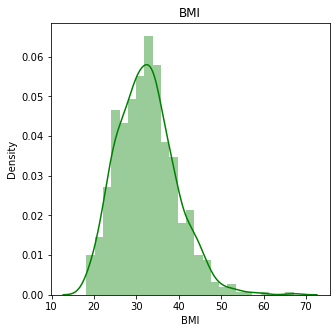

In [12]:
# Plotting the distribution to see the results of knn
for i in cols:
    plt.figure(figsize=(5,5))
    sns.distplot(imputed_df[i],color="green")
    plt.title(i)

In [13]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


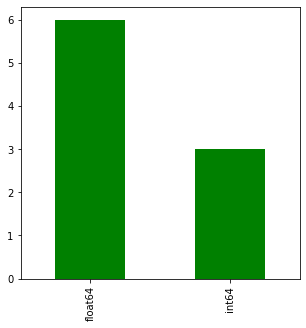

In [14]:
# Frequency plot for data type description
plt.figure(figsize=(5,5))
df.dtypes.value_counts().plot(kind='bar',color="green")
plt.show()

0.0    500
1.0    268
Name: Outcome, dtype: int64


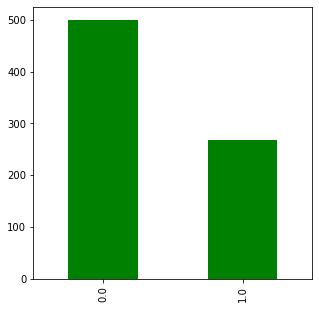

In [15]:
# Checking the data balancement
print(imputed_df['Outcome'].value_counts())
plt.figure(figsize=(5,5))
imputed_df['Outcome'].value_counts().plot(kind='bar',color='green')
plt.show()

#### The data is very imbalanced
#### <i>Future plan of course:</i> We can use <b>Over Sampling methods</b> to deal with this issue

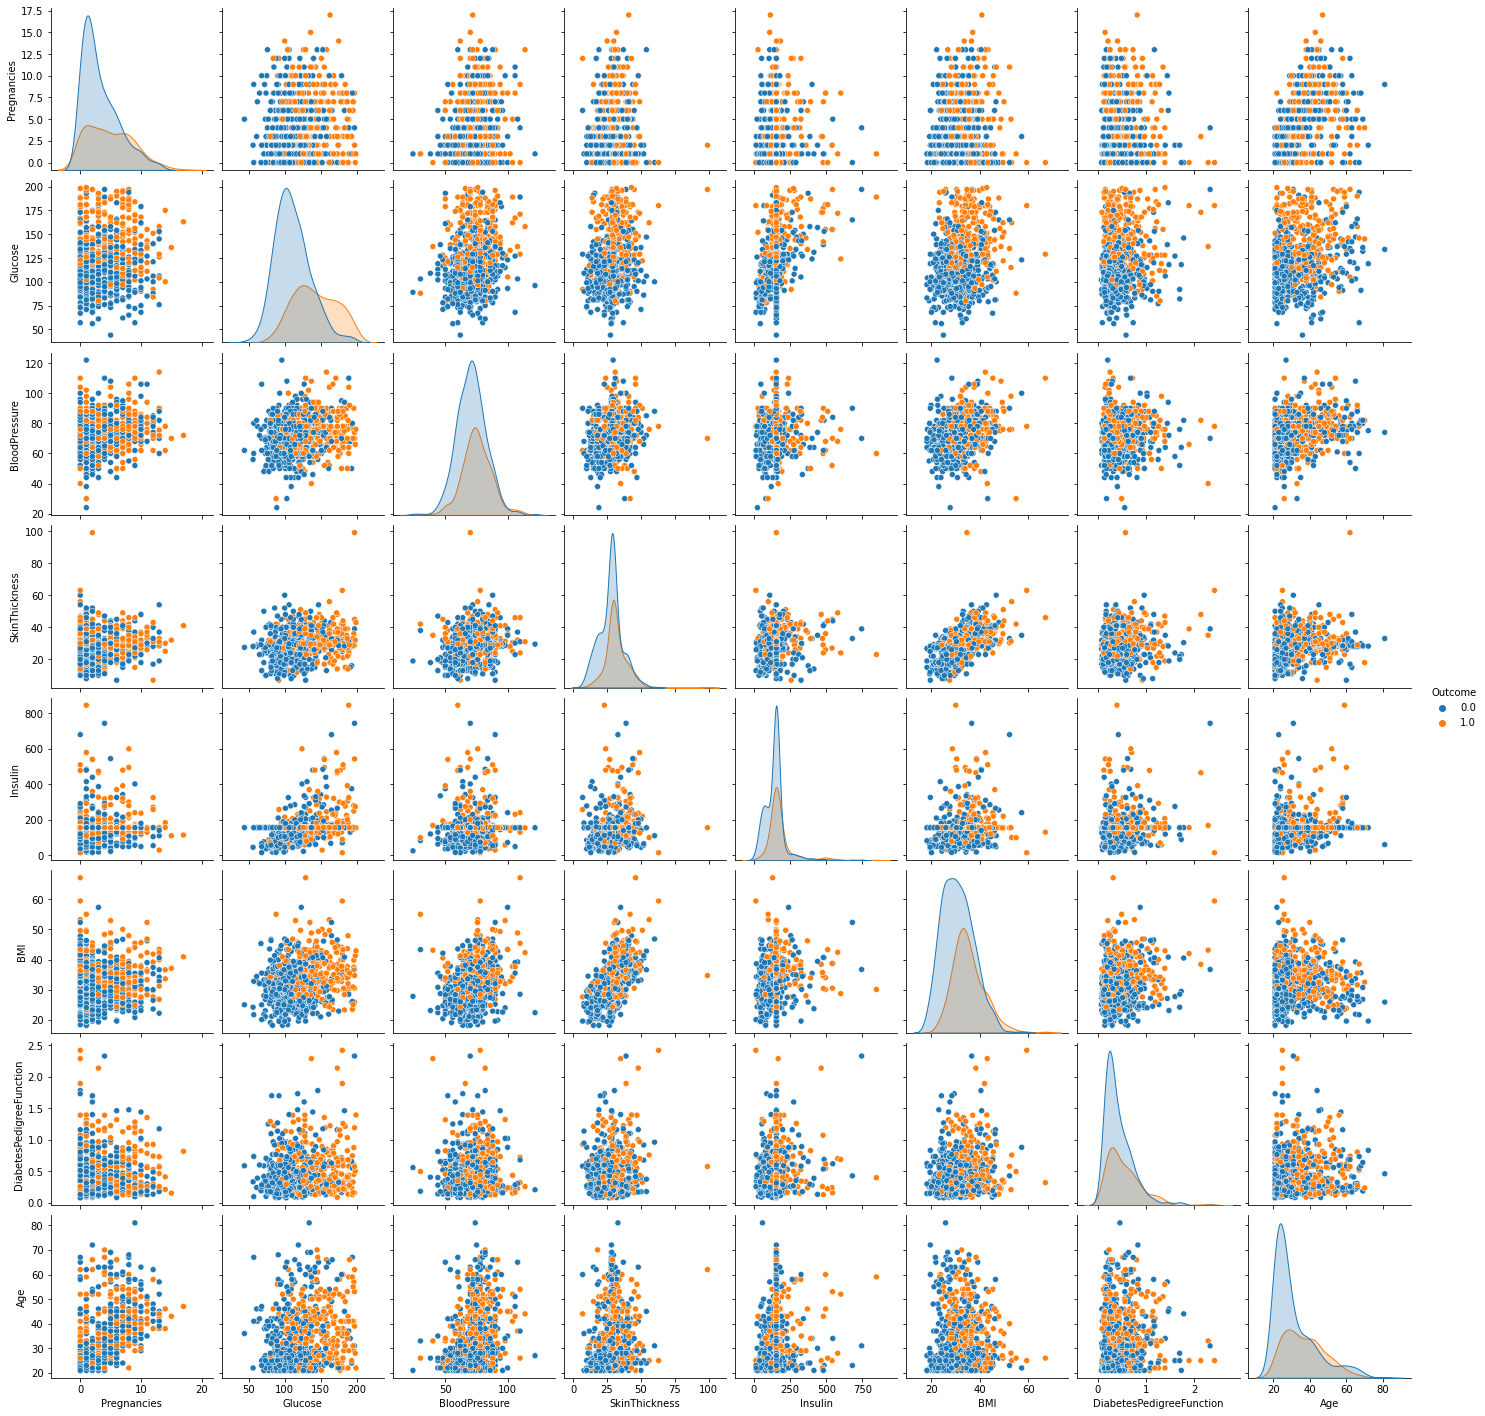

In [16]:
# scatter charts between the pair of variables to understand the relationships
sns.pairplot(imputed_df,hue='Outcome')

In [17]:
# Correlation table
imputed_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128836,0.209254,0.086101,0.055951,0.022265,-0.033523,0.544341,0.221898
Glucose,0.128836,1.000000,0.224145,0.202219,0.421438,0.233978,0.137727,0.267618,0.493583
BloodPressure,0.209254,0.224145,1.000000,0.204309,0.071821,0.286125,-0.000012,0.328045,0.171428
SkinThickness,0.086101,0.202219,0.204309,1.000000,0.157729,0.564944,0.104332,0.127009,0.226354
Insulin,0.055951,0.421438,0.071821,0.157729,1.000000,0.166655,0.098670,0.136382,0.214331
BMI,0.022265,0.233978,0.286125,0.564944,0.166655,1.000000,0.152599,0.027743,0.313821
DiabetesPedigreeFunction,-0.033523,0.137727,-0.000012,0.104332,0.098670,0.152599,1.000000,0.033561,0.173844
Age,0.544341,0.267618,0.328045,0.127009,0.136382,0.027743,0.033561,1.000000,0.238356
Outcome,0.221898,0.493583,0.171428,0.226354,0.214331,0.313821,0.173844,0.238356,1.000000


<AxesSubplot:>

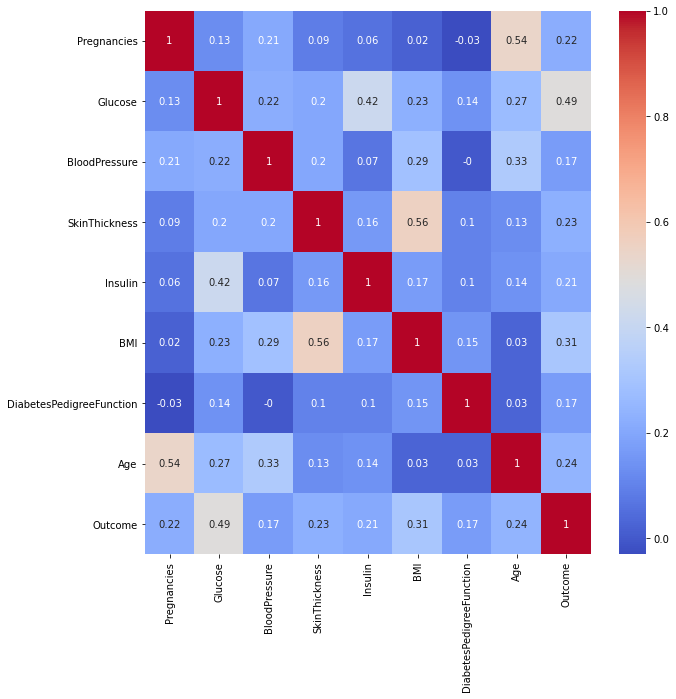

In [18]:
# Heatmap to visualize the above corr table
plt.figure(figsize=(10,10))
sns.heatmap(round(imputed_df.corr(),2),cmap="coolwarm",annot=True)

### DATA MODELLING

In [19]:
# Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
imputed_df_scaled = scaler.fit_transform(imputed_df)

In [21]:
imputed_df_scaled = pd.DataFrame(imputed_df_scaled, columns=imputed_df.columns)
imputed_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.169872,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.243128,0.169921,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
x = imputed_df_scaled.drop('Outcome', axis = 1)
y = imputed_df_scaled['Outcome']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [25]:
print("Shapes \nx_train: ",x_train.shape,"\ny_train: ",y_train.shape,"\nx_test: ",x_test.shape,"\ny_test: ",y_test.shape)
print("\nx_train:",x_train.head(),"\n\n\ny_train: ",y_train.head())

Shapes 
x_train:  (614, 8) 
y_train:  (614,) 
x_test:  (154, 8) 
y_test:  (154,)

x_train:      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
343     0.294118  0.503226       0.632653       0.246656  0.169665  0.337423   
155     0.411765  0.696774       0.653061       0.402174  0.168773  0.650307   
610     0.176471  0.400000       0.306122       0.152174  0.173077  0.259714   
672     0.588235  0.154839       0.836735       0.173913  0.042067  0.353783   
502     0.352941  0.502087       0.448980       0.369565  0.170342  0.425358   

     DiabetesPedigreeFunction       Age  
343                  0.090521  0.200000  
155                  0.110589  0.250000  
610                  0.091375  0.050000  
672                  0.088386  0.433333  
502                  0.277114  0.333333   


y_train:  343    0.0
155    1.0
610    0.0
672    0.0
502    1.0
Name: Outcome, dtype: float64


### Classification models

In [26]:
lr = LogisticRegression()

In [27]:
# Fitting the data
lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Predicting using x_test
y_pred = lr.predict(x_test)
y_pred[:5]

array([1., 0., 0., 0., 1.])

In [29]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[88, 12],
       [27, 27]], dtype=int64)

In [30]:
cnf_matrix[0][0]

88

In [31]:
# Accuracy of the model
lr.score(x_test,y_test)

0.7467532467532467

In [32]:
# Confusion matrix parameter
def cm_para(cm):
    acc = (cm[0,0] + cm[1,1])/sum(sum(cm))
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return('Accuracy: {}'.format(round(acc, 2)), 'Sensitivity: {}'.format(round(sensitivity, 2)), 'Specificity: {}'.format(round(specificity,2)))


In [33]:
print(cm_para(cnf_matrix))
print(classification_report(y_test,y_pred))

('Accuracy: 0.75', 'Sensitivity: 0.88', 'Specificity: 0.5')
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       100
         1.0       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



Text(0.5, 1.0, 'Accuracy Score: 74.68')

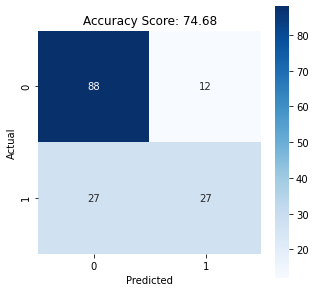

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf_matrix,square=True,annot=True,cmap="Blues",fmt='d',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Accuracy Score: {0}'.format(round(lr.score(x_test,y_test)*100,2)))

##### Since the dataset is imbalanced, oversampling the minority class here using SMOTE to solve the CLASS IMBALANCEMENT PROBLEM

In [35]:
from imblearn.over_sampling import SMOTE
ovr_sampl = SMOTE(random_state=10)

In [36]:
ovr_sampl_X, ovr_sampl_Y = ovr_sampl.fit_resample(x,y)

#Creating dataframes from them
ovr_sampl_X = pd.DataFrame(ovr_sampl_X,columns=x_train.columns)
ovr_sampl_Y = pd.DataFrame(ovr_sampl_Y,columns=['Outcome'])


In [37]:
# Data overview after oversampling
print(len(ovr_sampl_X))
print(ovr_sampl_Y['Outcome'].value_counts())

1000
0.0    500
1.0    500
Name: Outcome, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(ovr_sampl_X,ovr_sampl_Y, test_size=0.2, random_state=0)

# Various other models for comparison purposes

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scikitplot as skplt

In [40]:
# Including some extra models(Neural Net,QDA,Gaussian Process) as well for comparison purpose only
# Most of the parameters are default/close to default, hyperparameter tuning can also be done to enhance the final result

names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifier:  Nearest Neighbors
82.0
('Accuracy: 0.75', 'Sensitivity: 0.88', 'Specificity: 0.5')

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       105
         1.0       0.77      0.89      0.83        95

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200




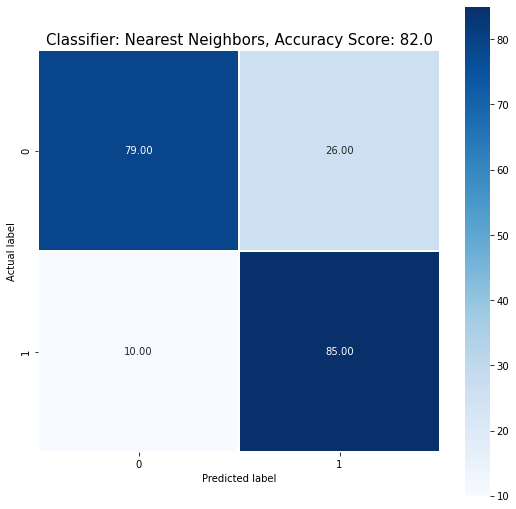

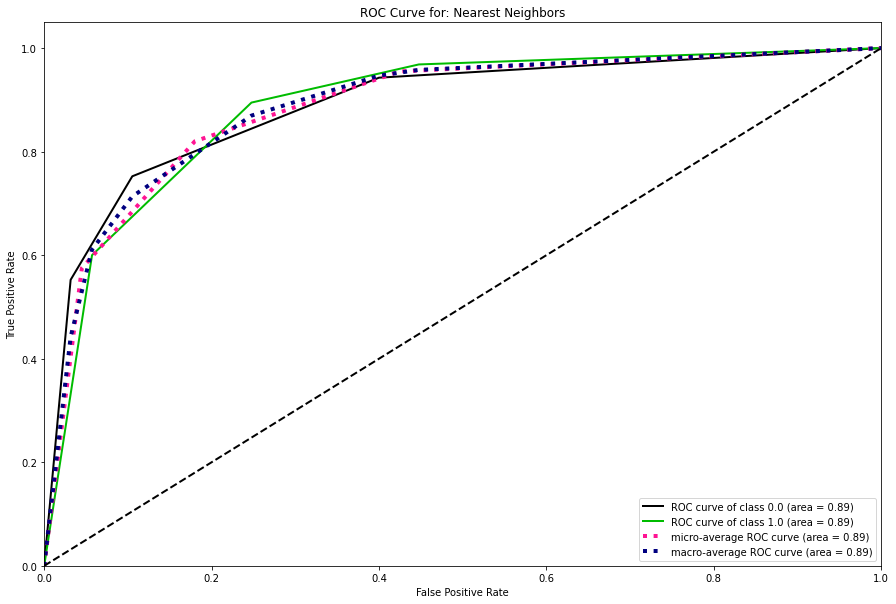

_____________________________________________________________________________________

classifier:  Logistic Regression
80.5
('Accuracy: 0.82', 'Sensitivity: 0.75', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       105
         1.0       0.78      0.82      0.80        95

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200




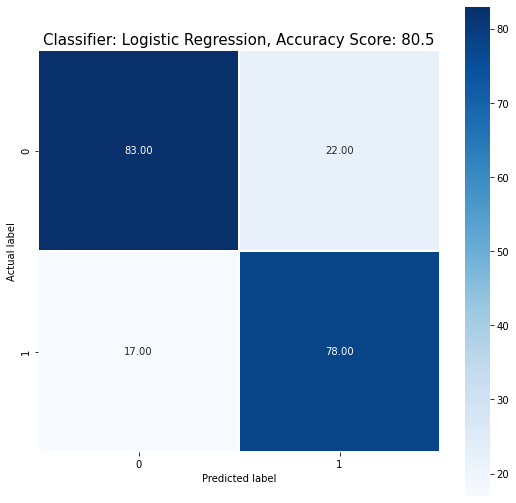

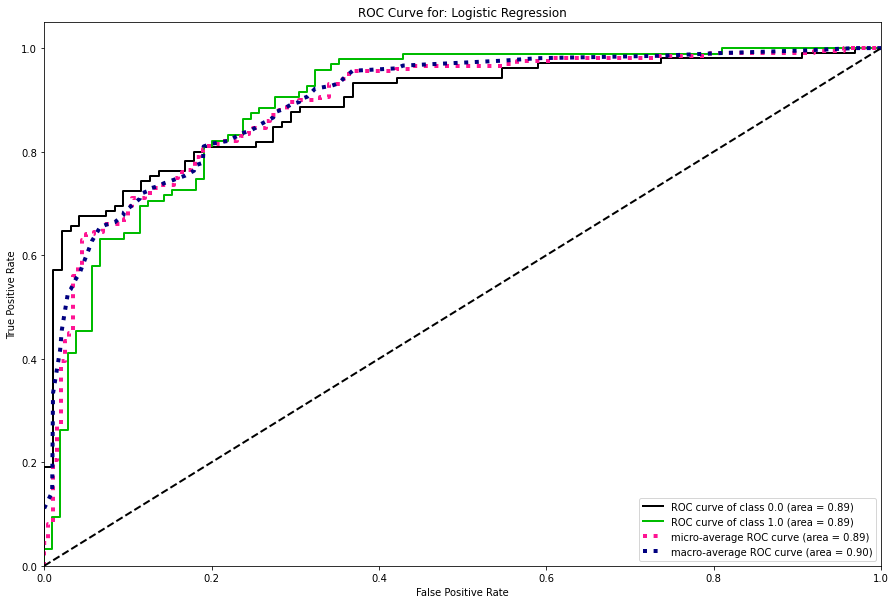

_____________________________________________________________________________________

classifier:  Linear SVM
78.5
('Accuracy: 0.8', 'Sensitivity: 0.79', 'Specificity: 0.82')

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       105
         1.0       0.78      0.77      0.77        95

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200




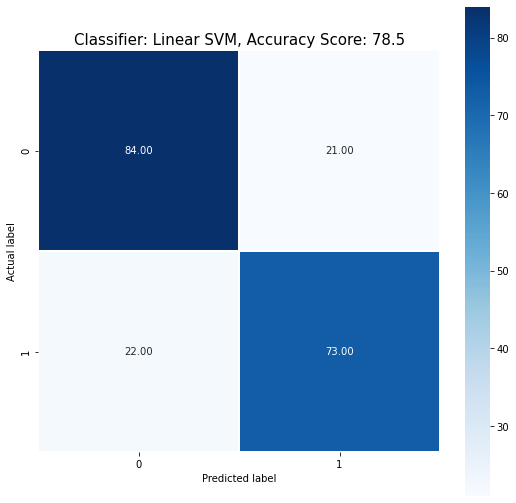

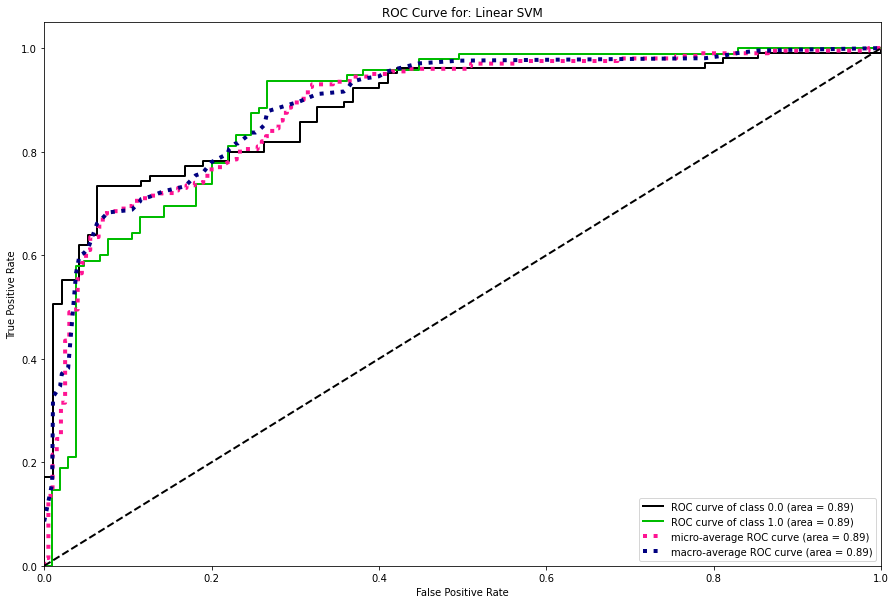

_____________________________________________________________________________________

classifier:  RBF SVM
85.0
('Accuracy: 0.78', 'Sensitivity: 0.8', 'Specificity: 0.77')

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       105
         1.0       0.81      0.89      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200




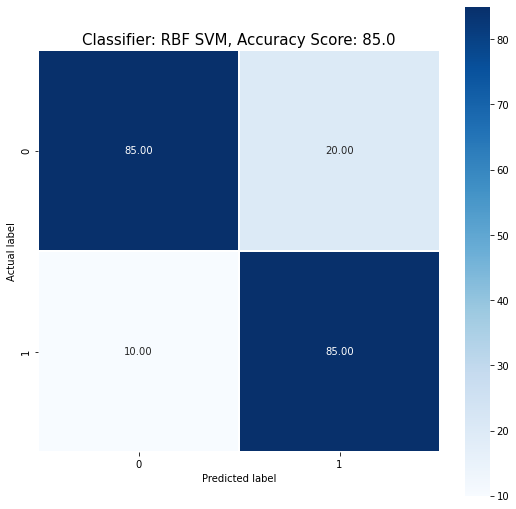

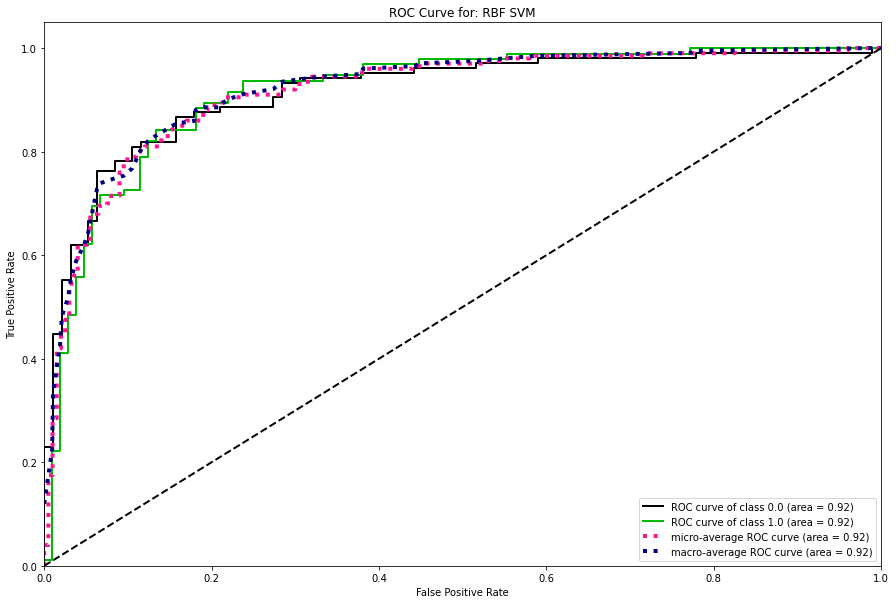

_____________________________________________________________________________________

classifier:  Gaussian Process
84.5
('Accuracy: 0.85', 'Sensitivity: 0.81', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       105
         1.0       0.80      0.89      0.85        95

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200




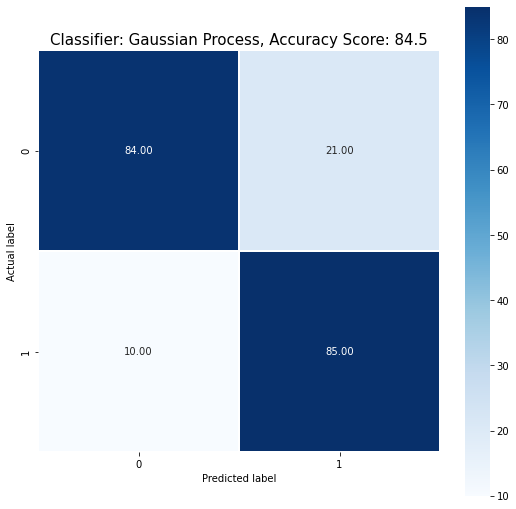

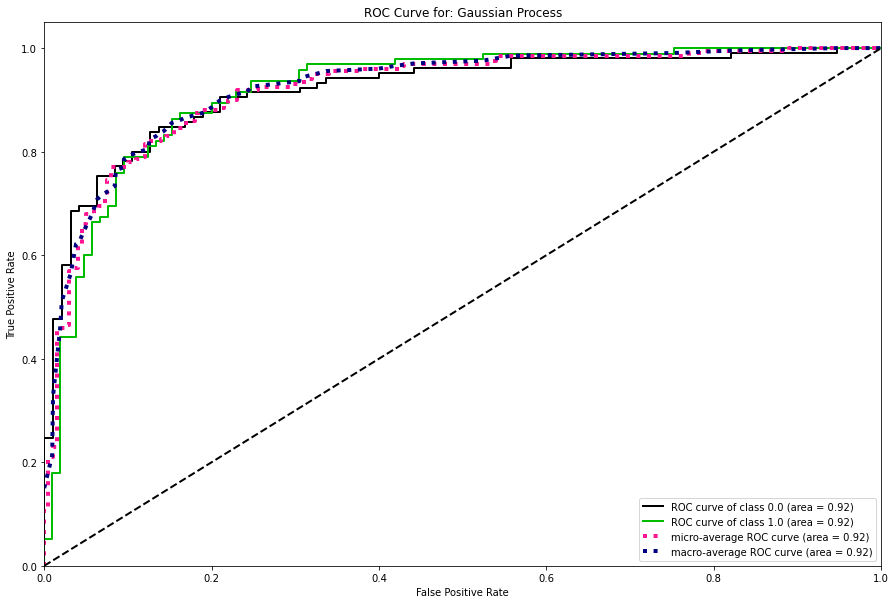

_____________________________________________________________________________________

classifier:  Decision Tree
79.5
('Accuracy: 0.84', 'Sensitivity: 0.8', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.79       105
         1.0       0.74      0.87      0.80        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.81      0.80      0.79       200




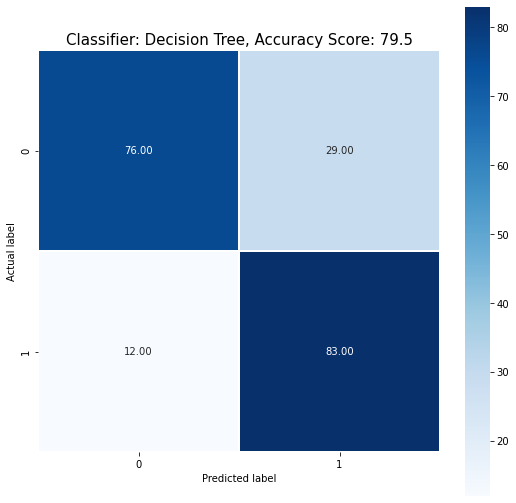

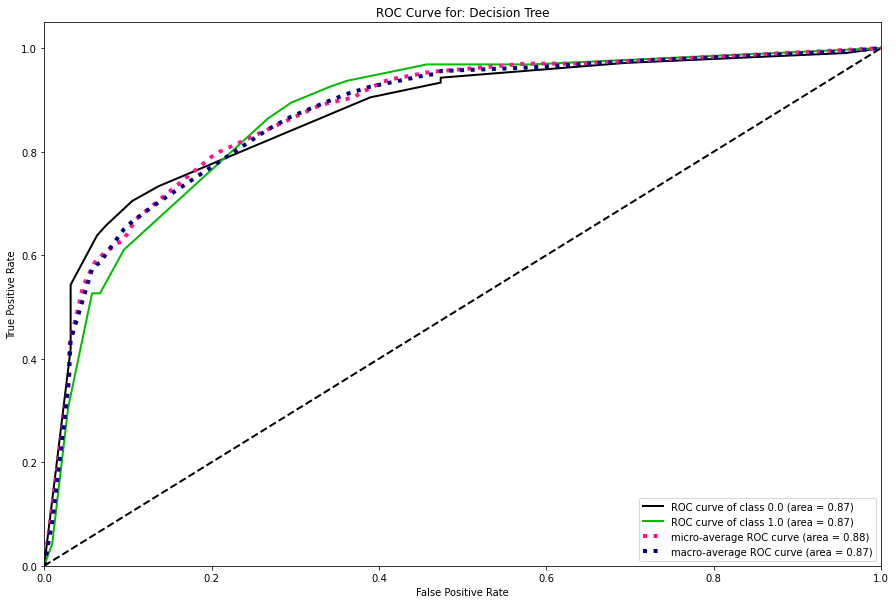

_____________________________________________________________________________________

classifier:  Random Forest
78.5
('Accuracy: 0.8', 'Sensitivity: 0.72', 'Specificity: 0.87')

              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77       105
         1.0       0.73      0.87      0.79        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200




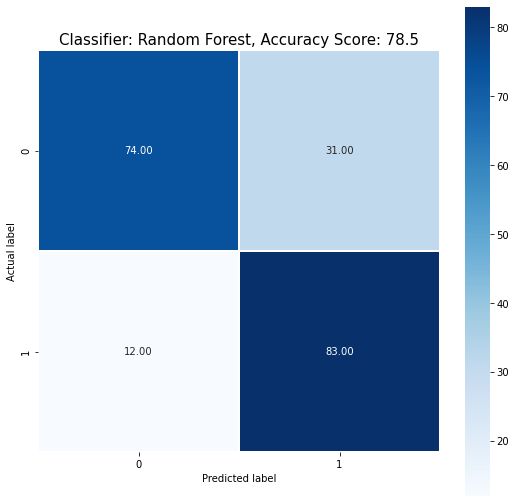

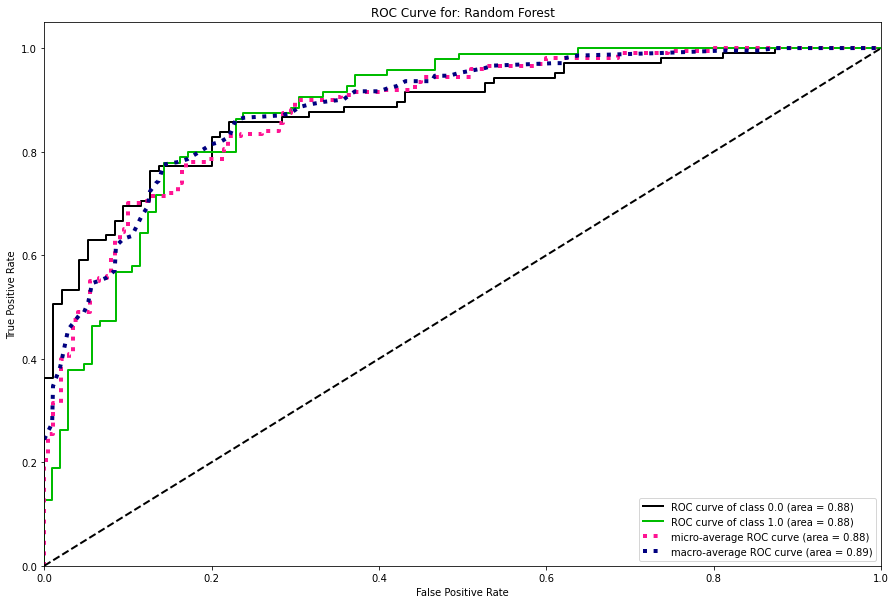

_____________________________________________________________________________________

classifier:  Neural Net
80.0
('Accuracy: 0.78', 'Sensitivity: 0.7', 'Specificity: 0.87')

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       105
         1.0       0.77      0.82      0.80        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200




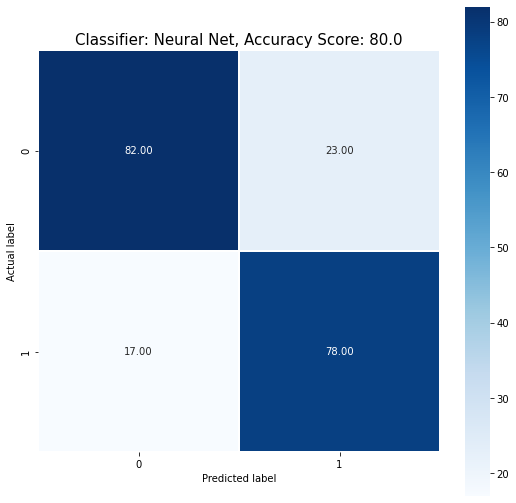

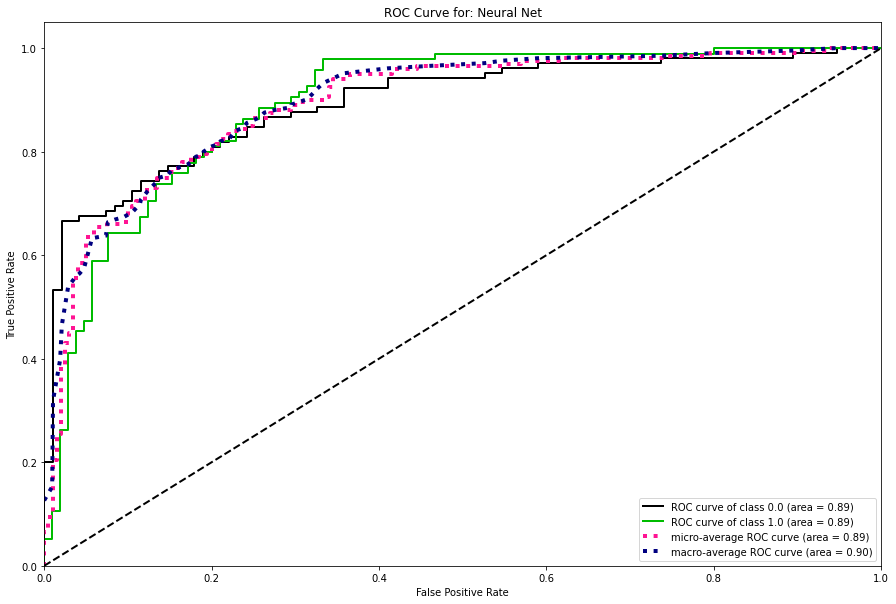

_____________________________________________________________________________________

classifier:  AdaBoost
81.0
('Accuracy: 0.8', 'Sensitivity: 0.78', 'Specificity: 0.82')

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       105
         1.0       0.78      0.84      0.81        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200




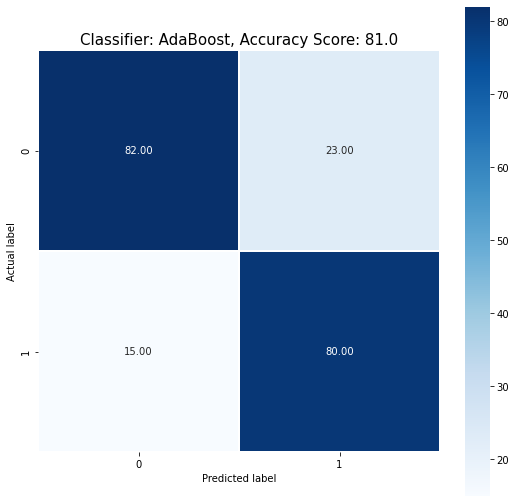

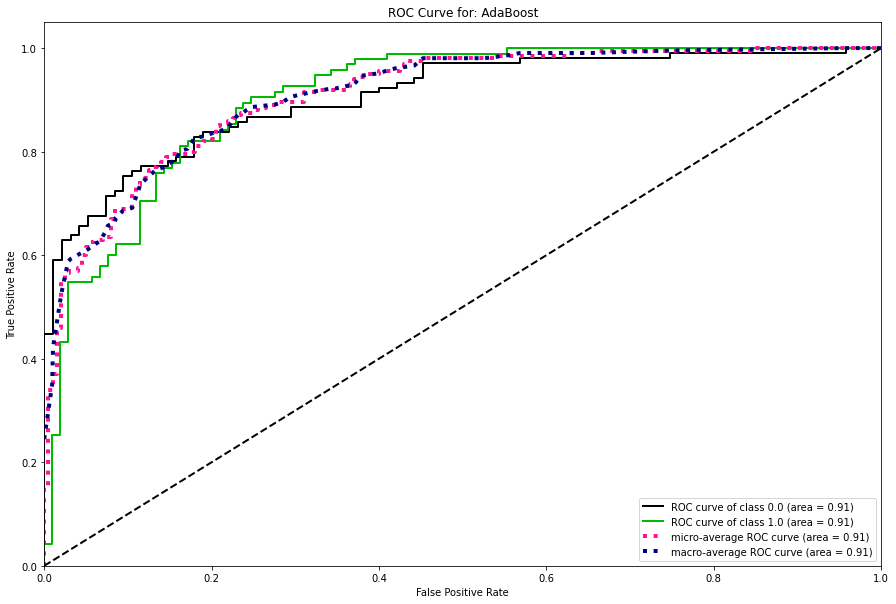

_____________________________________________________________________________________

classifier:  Naive Bayes
78.5
('Accuracy: 0.81', 'Sensitivity: 0.78', 'Specificity: 0.84')

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       105
         1.0       0.78      0.76      0.77        95

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200




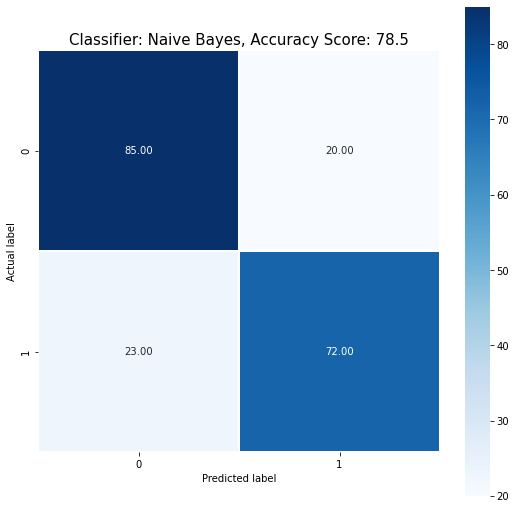

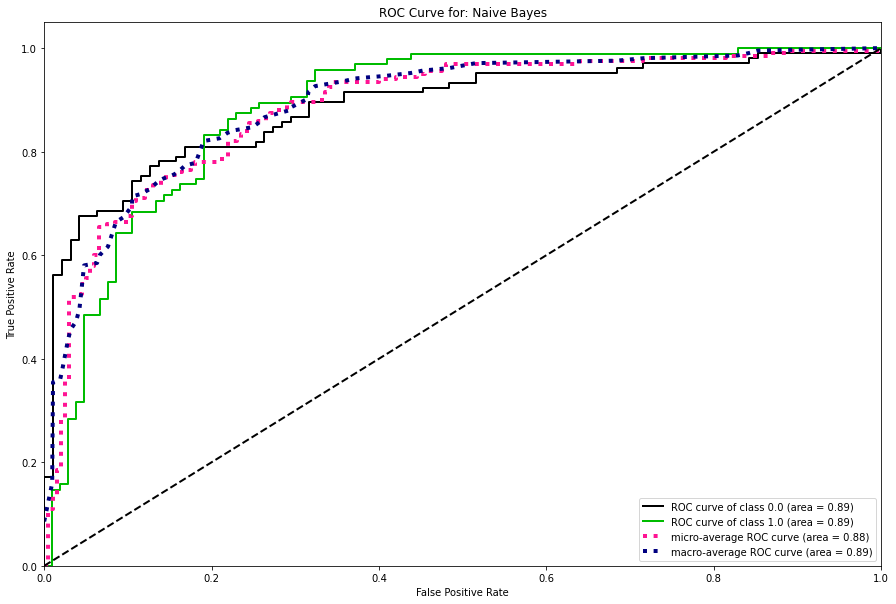

_____________________________________________________________________________________

classifier:  QDA
80.0
('Accuracy: 0.78', 'Sensitivity: 0.81', 'Specificity: 0.76')

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       105
         1.0       0.80      0.78      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200




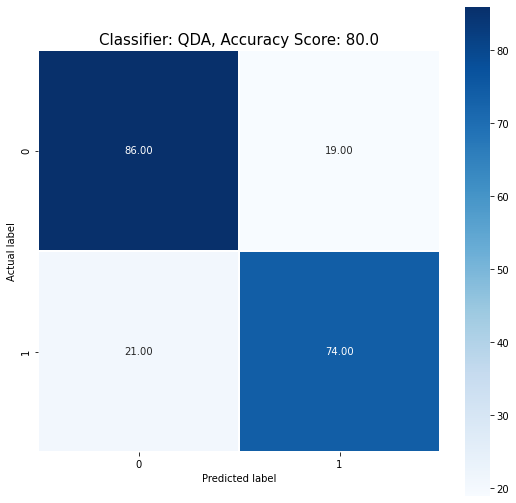

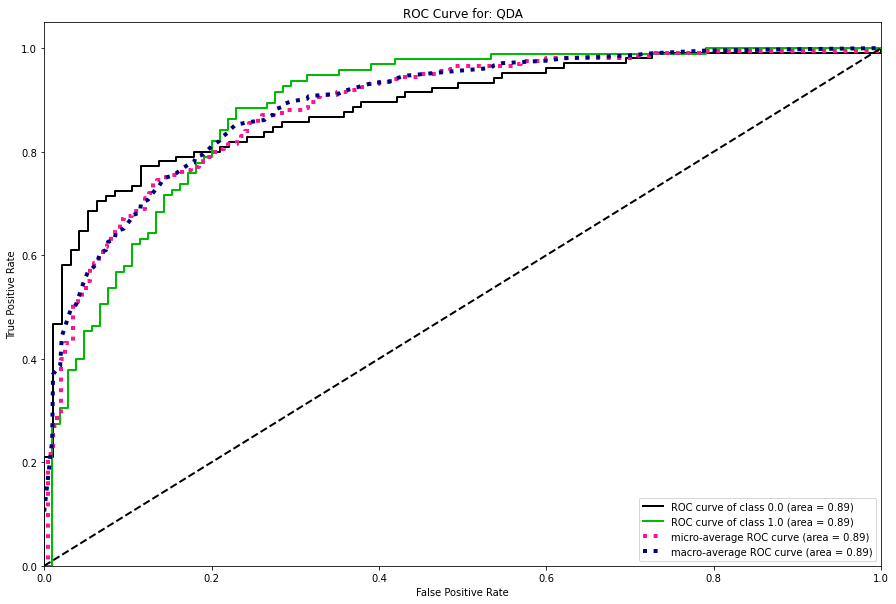

_____________________________________________________________________________________



In [41]:
for name, clf in zip(names, classifiers):
        
        print('classifier: ', name)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        pred = clf.predict(X_test)
        prob = clf.predict_proba(X_test)
        print(round(score*100, 2))
        print(cm_para(cnf_matrix))
        print()
        
        cnf_matrix = confusion_matrix(y_test, pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = "Blues",cbar=True);
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title ='Classifier: {}, Accuracy Score: {}'.format(name, round(score*100, 2))
        plt.title(all_sample_title, size = 15);

        print(classification_report(y_test, pred))
        print()

        skplt.metrics.plot_roc_curve(y_test, prob, figsize = (15, 10), title = 'ROC Curve for: {}'.format(name))
        plt.show()
        print('_____________________________________________________________________________________')
        print()

### The best performing model is <b>SVM</b> with 85 accuracy score and all the others are mostly around 80